# Arbres de Décision - Algorithme CART

<a name="Arbre de Décision - Algorithme CART"></a>

## Introduction

<a name="Introduction"></a>

Publié par Leo Breiman en 1984, l'algorithme CART (Classification and Regression Trees) servira comme une méthode pour construire des arbres de décision pouvant être utilisés à la fois pour la classification et la régression. Depuis, CART est devenu un algorithme fondamental dans le domaine de l'apprentissage automatique et de l'analyse de données.

## Mesure d'Homogénéité

<a name="Mesure d'Homogénéité"></a>

Dans le cadre de la régression, on peut mesurer l'homogénéité à partir du calcul de la variance. Effectivement, si les données sont plus "variées" entre eux, elles deviennent plus hétérogènes. Ainsi, l'homogénéité est donné par la variance minimale.

## Simulations

<a name="Simulations"></a>

Importons les packages nécessaires en premier :


In [1]:
#| echo: FALSE
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import graphviz

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import learning_curve

sys.path.append('./Code/')

from sklearn import tree, datasets
from tp_arbres_source import (rand_gauss, rand_bi_gauss, rand_tri_gauss,
                              rand_checkers, rand_clown,
                              plot_2d, frontiere)

En utilisant la fonction `rand_checkers`, on construit un échantillon de taille $n=456$ bien équilibré.


In [2]:
#| echo: false
data = rand_checkers(n1=114,n2=114,n3=114,n4=114,sigma=0.1)
n_samples = len(data)
X_train = data[:, :2]
Y_train = data[:, 2].astype(int)

Ensuite, on calcul le pourcentage d'erreurs comises en fonction de la profondeur maximale des arbres de décisions selon les critères "indice de Gini" et "entropie". Pour exécuter cette étape, il faut importer le module `tree` de `sklearn`.


Scores with entropy criterion:  [0.25669643 0.26785714 0.28348214 0.32142857 0.46205357 0.62276786
 0.74107143 0.82589286 0.95535714 0.97098214 0.99330357 0.99776786]
Scores with Gini criterion:  [0.25669643 0.26785714 0.28348214 0.328125   0.5        0.609375
 0.82142857 0.9375     0.96205357 0.98214286 0.99330357 1.        ]


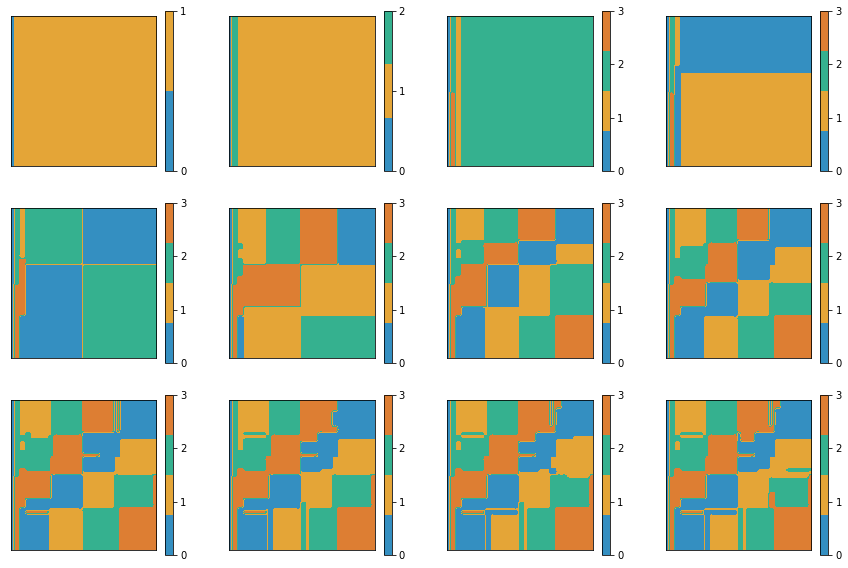

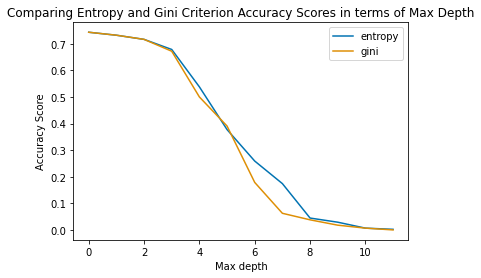

In [3]:
#| echo: false
dt_entropy = tree.DecisionTreeClassifier(criterion='entropy')
dt_gini = tree.DecisionTreeClassifier(criterion='gini')

dmax = 12
scores_entropy = np.zeros(dmax)
scores_gini = np.zeros(dmax)

plt.figure(figsize=(15, 10))
for i in range(dmax):
    dt_entropy = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i+1)
    dt_entropy.fit(X_train,Y_train)
    scores_entropy[i] = dt_entropy.score(X_train, Y_train)

    dt_gini = tree.DecisionTreeClassifier(criterion='gini',max_depth=i+1)
    dt_gini.fit(X_train,Y_train)
    scores_gini[i] = dt_gini.score(X_train, Y_train)

    plt.subplot(3, 4, i + 1)
    frontiere(lambda x: dt_gini.predict(x.reshape((1, -1))), X_train, Y_train, step=50, samples=False)
plt.draw()

plt.figure()
plt.plot(1-scores_entropy, label='entropy')
plt.plot(1-scores_gini, label='gini')
plt.xlabel('Max depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.title("Comparing Entropy and Gini Criterion Accuracy Scores in terms of Max Depth")
plt.draw()
print("Scores with entropy criterion: ", scores_entropy)
print("Scores with Gini criterion: ", scores_gini)

On remarque que l'erreur diminue pour les deux courbes semblablement et presque s'annule à partir d'une profondeur maximale égale à 10. L'idée est de trouver une profondeur maximale idéale qui servira à éviter le sur-apprentissage et le sous-apprentissage.

## Classification pour une Erreur Minimale (Entropie)

<a name="Classification pour une Erreur Minimale (Entropie)"></a>

Avec la fonction `frontiere`, on obtient la classification obtenue avec l'entropie pour une profondeur maximale choisie arbitrairement. Ici, on prend `max_depth = 10`.


Best score with entropy criterion:  0.9977678571428571


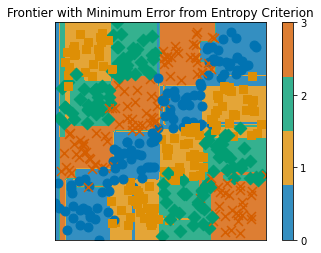

In [4]:
#| echo: false
dt_entropy.max_depth = 10

plt.figure()
frontiere(lambda x: dt_entropy.predict(x.reshape((1, -1))), X_train, Y_train, step=100)
plt.title("Frontier with Minimum Error from Entropy Criterion")
plt.draw()
print("Best score with entropy criterion: ", dt_entropy.score(X_train, Y_train))

## Arbres de Décision

<a name="Arbres de Décisions"></a>

Avec le package `graphviz`, on est capable de visualiser l'arbre de décision des données. On obtient le résultat suivant :

<img src="Schémas/Arbre_Q4.png" width="800"/>

Un arbre de décision s'agit d'un nœud principal appelé "racine" donnant deux nœuds enfants. Chaque nœud non-terminal engendre à son tour deux autres nœuds, et ainsi de suite. À mesure que l'arbre progresse, nous atteignons finalement les nœuds terminaux, où les décisions sont prises.

Si la condition au niveau du nœud $k$ est satisfaite, nous empruntons la branche de gauche ; autrement, nous suivons la branche de droite.

## Nouveau Echantillon

<a name="Nouveau Echantillon"></a>

Reprenons la même démarche qu'avant mais avec de nouvelles données.


[0.75    0.75    0.75    0.71875 0.575   0.39375 0.2875  0.2125  0.175
 0.16875 0.1875  0.1875  0.1875  0.18125 0.1875  0.1875  0.18125 0.19375
 0.1875  0.19375]


<Figure size 432x504 with 0 Axes>

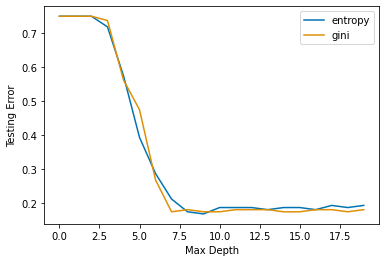

In [5]:
#| echo: false
data_test = rand_checkers(40, 40, 40, 40)
X_test = data_test[:, :2]
Y_test = data_test[:, 2].astype(int)

dmax = 20
scores_entropy = np.zeros(dmax)
scores_gini = np.zeros(dmax)
plt.figure(figsize=(6, 7))

for i in range(dmax):
    dt_entropy = tree.DecisionTreeClassifier(criterion='entropy',
                                             max_depth=i + 1)
    dt_entropy.fit(X_train, Y_train)
    scores_entropy[i] = dt_entropy.score(X_test, Y_test)

    dt_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=i+1)
    dt_gini.fit(X_train, Y_train)
    scores_gini[i] = dt_gini.score(X_test, Y_test)

plt.draw()
plt.figure()
plt.plot(1-scores_entropy, label='entropy')
plt.plot(1-scores_gini, label='gini')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Testing Error')
print(1-scores_entropy)

Comme dans la première partie, les erreurs des deux critères se comportent de la même manière. On note qu'avec une taille de n = 160 \< 456, l'erreur s'annule plus rapidement. Dès une profondeur maximale de 9, il est clair qu'il sera inutile d'augmenter la profondeur vue que l'erreur est pratiquement stable à ce point là.

## Dataset `DIGITS`

<a name="Dataset `DIGITS`"></a>

On effectue encore une fois la même étude mais cette fois-ci sur les données `DIGITS` disponibles sur Python dans le module `sklearn.datasets`. On découpe tout d'abord les données en "testing set" et "training set" et ceci à travers la fonction `train_test_split`.


In [6]:
#| echo: false
digits = datasets.load_digits()

X, y = digits.data, digits.target

ntest = len(digits.data)-int(len(digits.data)*0.8)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

X_train = digits.data[:ntest]
Y_train = digits.target[:ntest]
X_test = digits.data[ntest:]
Y_test = digits.target[ntest:]

dt_entropy = tree.DecisionTreeClassifier(criterion='entropy')
dt_gini = tree.DecisionTreeClassifier(criterion='gini')

dt_entropy.fit(X_train, Y_train)
dt_gini.fit(X_train, Y_train)

print(dt_entropy)
print(dt_entropy.get_params())

DecisionTreeClassifier(criterion='entropy')
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


Maintenant, on s'intéresse à l'erreur :


Error with entropy criterion:  [0.78611111 0.60833333 0.35555556 0.18055556 0.04722222 0.01666667
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
Error with Gini criterion:  [0.78611111 0.68055556 0.56111111 0.425      0.24444444 0.08611111
 0.03333333 0.01666667 0.00555556 0.00277778 0.         0.
 0.         0.         0.        ]


<Figure size 1080x720 with 0 Axes>

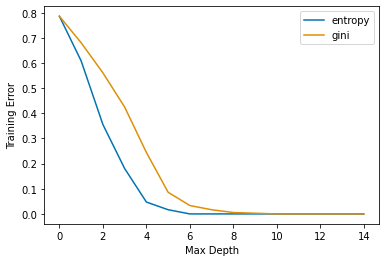

In [7]:
#| echo: false
dmax = 15
scores_entropy = np.zeros(dmax)
scores_gini = np.zeros(dmax)

plt.figure(figsize=(15, 10))
for i in range(dmax):
    dt_entropy = tree.DecisionTreeClassifier(criterion='entropy',
                                             max_depth=i+1)
    dt_entropy.fit(X_train, Y_train)
    scores_entropy[i] = dt_entropy.score(X_train, Y_train)

    dt_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=i+1)
    dt_gini.fit(X_train, Y_train)
    scores_gini[i] = dt_gini.score(X_train, Y_train)
plt.draw()


plt.figure()
plt.plot(1-scores_entropy, label='entropy')
plt.plot(1-scores_gini, label='gini')
plt.xlabel('Max Depth')
plt.ylabel('Training Error')
plt.legend(["entropy", "gini"])
plt.draw()
print("Error with entropy criterion: ", 1-scores_entropy)
print("Error with Gini criterion: ", 1-scores_gini)

On remarque ici que pour les données d'entrainement, le graphe renseigne une erreur nulle au bout d'une profondeur maximale égale à 8. Ceci est cohérent avec le travail d'avant. Ce qui est plus important, c'est l'erreur avec les données test :


[0.17884482 0.30688935 0.47738344 0.57759221 0.69380654 0.68475992
 0.69241475 0.71816284 0.69728601 0.69589422 0.69728601 0.710508
 0.68963118 0.68963118 0.71259569]


<Figure size 432x504 with 0 Axes>

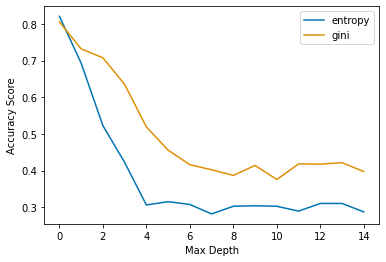

In [8]:
#| echo: false
dmax = 15
scores_entropy = np.zeros(dmax)
scores_gini = np.zeros(dmax)

plt.figure(figsize=(6, 7))
for i in range(dmax):
    dt_entropy = tree.DecisionTreeClassifier(criterion='entropy',
                                             max_depth=i + 1)
    dt_entropy.fit(X_train, Y_train)
    scores_entropy[i] = dt_entropy.score(X_test, Y_test)

    dt_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=i+1)
    dt_gini.fit(X_train, Y_train)
    scores_gini[i] = dt_gini.score(X_test, Y_test)

plt.draw()
plt.figure()
plt.plot(1-scores_entropy, label='entropy')
plt.plot(1-scores_gini, label='gini')
plt.legend(["entropy", "gini"])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
print(scores_entropy)

Avec les données test, on trouve une différence avec l'entropie et l'indice de gini. En effet, l'entropie aboutit à de meilleurs résultats et des erreurs plus petites que celles obtenues avec l'indice de gini. De plus, la chute des erreurs est plus rapide avec l'entropie qu'avec l'indice de gini. D'après le graphe, on peut dire que 6 est un bon choix de profondeur.

#Méthodes de Choix de Paramètres - Sélection de modèle
<a name="Méthodes de Choix de Paramètres - Sélection de modèle"></a>

## Validation Croisée
<a name="Validation Croisée"></a>

La fonction `cross_val_score` effectue une validation croisée afin de déterminer la profondeur optimale de l'arbre qui minimise l'erreur. Elle prend en entrée un arbre, un critère de sélection, une profondeur maximale, ainsi que les données d'observation $X$ et les réponses $y$.

Cette fonction divise l'ensemble de données $X$ en un ensemble d'apprentissage et un ensemble de test. L'arbre est entraîné sur l'ensemble d'apprentissage, puis testé sur l'ensemble de test, et enfin, la précision des prédictions est évaluée par rapport aux réponses $y$. Ce processus est répété plusieurs fois, généralement 10 fois (paramètre cv=10`), avec des divisions différentes entre les ensembles d'apprentissage et de test.

À la fin de ces répétitions, on obtient un vecteur contenant les scores obtenus pour chaque itération. Ensuite, ces scores sont moyennés. Cette procédure est répétée à plusieurs itérations afin de déterminer la profondeur optimale qui donne l'erreur minimale.


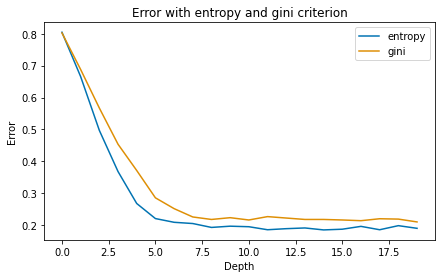

[0.8046719281956051, 0.6655648406066234, 0.49693902816465496, 0.3678149179820489, 0.2676199319096254, 0.22032961931290618, 0.20863664500154755, 0.2047508511296814, 0.1925379139585267, 0.19642216032188176, 0.19474156607861348, 0.1852770040235221, 0.18862426493345708, 0.19085886722376988, 0.18472763850201157, 0.18694831321572258, 0.19585112968121332, 0.18528009904054488, 0.1980810894459919, 0.18974001857010203]
[0.8024512534818942, 0.6878118229650263, 0.5670256886412876, 0.4534757041163726, 0.37110182606004327, 0.2854178272980501, 0.2514979882389353, 0.2253358093469514, 0.21753017641597028, 0.2230950170225936, 0.2158743423088827, 0.22644227793252858, 0.22198545341999387, 0.21753791395852684, 0.21753946146703806, 0.21588207985143915, 0.21365676261219435, 0.21977251624883942, 0.21864747756112657, 0.20975394614670384]
15


In [9]:
np.random.seed(256)

error_ent = []
error_gini = []
dmax = 20
X = digits.data
y = digits.target
for i in range(dmax):
    dt_entropy = tree.DecisionTreeClassifier(criterion='entropy',
                                             max_depth=i + 1)
    accuracy = cross_val_score(dt_entropy, X, y)
    error_ent.append(1-accuracy.mean())
    dt_gini = tree.DecisionTreeClassifier(criterion='gini',
                                          max_depth=i + 1)
    accuracy2 = cross_val_score(dt_gini, X, y)
    error_gini.append(1-accuracy2.mean())

plt.figure(figsize=(7, 4))
plt.plot(error_ent, label="entropy")
plt.plot(error_gini, label="gini")
plt.xlabel('Depth')
plt.ylabel("Error")
plt.legend()
plt.title("Error with entropy and gini criterion")
plt.show()

print(error_ent)
print(error_gini)
best_depth = np.argmin(error_ent) + 1
print(best_depth)

On obtient une profondeur maximale optimale de 15. 
Il est possible d'obtenir des résultats différents avec la méthode de validation croisée pour une même dataset. Or, grâce à la moyenne des résultats, les valeurs finales sont plus ou moins régulées.

## Courbe d'Apprentissage
<a name="Courbe d'Apprentissage"></a>

Une courbe d'apprentissage est une représentation graphique montrant l'évolution du score d'un modèle d'apprentissage automatique avec l'augmentation de données d'entraînement. 


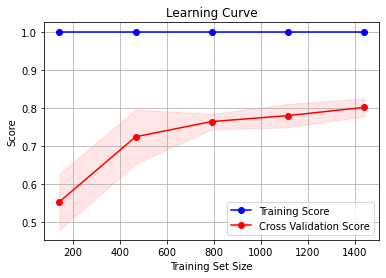

In [10]:
X = digits.data
y = digits.target
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)

n_samples, train_scores, test_scores = learning_curve(model, X, y, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.grid()
plt.fill_between(n_samples, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="blue")
plt.fill_between(n_samples, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="red")
plt.plot(n_samples, train_scores_mean, 'o-', color="blue",
         label="Training Score")
plt.plot(n_samples, test_scores_mean, 'o-', color="red",
         label="Cross Validation Score")
plt.legend()
plt.show()

La courbe en bleue correspond aux scores des données d'entrainement. Le score est constant pour une valeur de 1, c'est-à-dire le modèle a bien appris sur les données.
La courbe en rouge correspond aux scores de validation croisée augmente avec la taille du training set, même arrivant à un score de 0.8. Ceci signifie que le modèle ne se trouve ni dans une situation de sur-ajustement ni de sous-ajustement. 